FFR 120  
Felix Waldschock

HW 2  
Exercise 7.4

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


In [52]:
# parameters
alpha = 0.5
sigma0 = 1
dSigma = 1.8 
L = 100
dT = 0.01
x0 = 0


In [53]:
def getSpuriousDrift(x, dt):
    return alpha * dSigma / L

In [54]:
def getSigma(x):
    return sigma0 + dSigma*x/L

In [55]:
def update(x):
    # x comes as an array of size N
    sigma = getSigma(x)
    o = sigma + np.sqrt(dT)
    directions = np.random.choice([-1, 1], N)
    o = o * directions  
    x = x + getSpuriousDrift(x) + o

In [56]:
# 1. Simulation with alpha = 0.5
alpha = 0.5                                 # spurious drift coefficient
N = 10000                                   # number of trajectiories (particles)
T_tot = [10, 100, 1000, 10000]              # total time
T_tot = np.array(T_tot)
Iteration_Steps = T_tot * (1 / dT)          # total number of steps 

max_steps = int(np.max(Iteration_Steps))


In [57]:
# Run 1st Simulation 

def simulate_trajectory(N, max_steps, L):
    x = np.zeros(N)*x0
    trajectories = np.zeros((N, len(T_tot)))    # array to store trajectories  
    sigmas_ = np.zeros(N)         # array to store sigmas
    for s in trange(max_steps):
        # calc new sigma
        sigma = getSigma(x)
        o = sigma + np.sqrt(dT)
        directions = np.random.choice([-1, 1], N)

        # spurious drift
        spuriousDrift = getSpuriousDrift(x, dT)

        x += directions * o
        x += spuriousDrift
        # check boundaries
        x = np.where(x < -L/2, -L - x, x)
        x = np.where(x > L/2, L - x, x)
        
        if s in Iteration_Steps:
            index = np.where(Iteration_Steps == s)[0][0]
            trajectories[:, index] = x

    trajectories[:, -1] = x
    sigmas_ = sigma

    return trajectories, sigmas_

trajectories, sigmas_ = simulate_trajectory(N, max_steps, L)


100%|██████████| 1000000/1000000 [02:59<00:00, 5585.25it/s]


In [62]:
# save the trajectories to a file
if(1):
    np.savetxt('trajectories_74_0-5.npy', trajectories)
    np.savetxt('sigmas_74_0-5.npy', sigmas_)


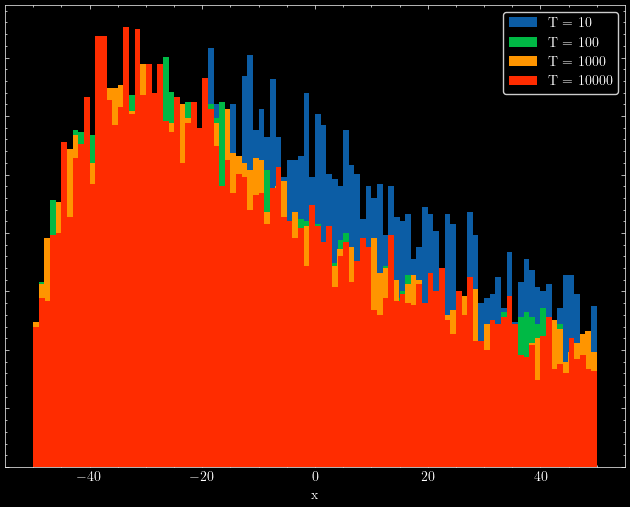

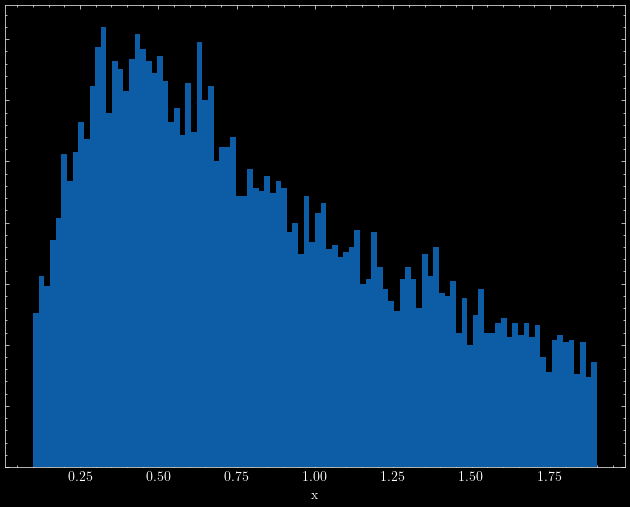

In [64]:
# load the trajectories from a file
trajectories = np.loadtxt('trajectories_74_0-5.npy')
sigmas_ = np.loadtxt('sigmas_74_0-5.npy')
bins = 100
alpha_plot = 1

# plot the trajectories in one histogram
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(trajectories[:, 0], bins=bins, density=True, label='T = 10', alpha=alpha_plot)
plt.hist(trajectories[:, 1], bins=bins, density=True, label='T = 100', alpha=alpha_plot)
plt.hist(trajectories[:, 2], bins=bins, density=True, label='T = 1000', alpha=alpha_plot)
plt.hist(trajectories[:, 3], bins=bins, density=True, label='T = 10000', alpha=alpha_plot)
# plt.hist(trajectories[:, 4], bins=100, density=True, label='T = 100000')
plt.xlabel('x')
plt.legend()
ax.set_yticklabels([])
plt.show()

# plot the sigmas
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(sigmas_, bins=100, label='sigmas')
plt.xlabel('x')
ax.set_yticklabels([])
plt.show()

In [ ]:
# print the means of the trajectories
print('mean of the trajectories:')
for i in range(len(T_tot)):
    print('T = {}: {}'.format(T_tot[i], np.mean(trajectories[:, i])))